
---


ECSE 415 : Assignment 1 

READ ME :  Whenever the mpimg.read function is called the following path nededs to be the path where the images are located in this case it is my Google Drive

Libraries used : Numpy , matplotlib , cv2 (for part 3 and setting images to grayscale) , and skimage to measure PSNR in part 2 


---



# 1. Tresholding

## 1.1 Simple Binary tresholding


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


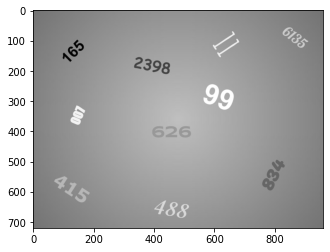

In [ ]:
#Setup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# Read in the image
image = mpimg.imread('/content/drive/My Drive/ECSE 415/Assignment1/images/numbers.jpg')

plt.imshow(image)



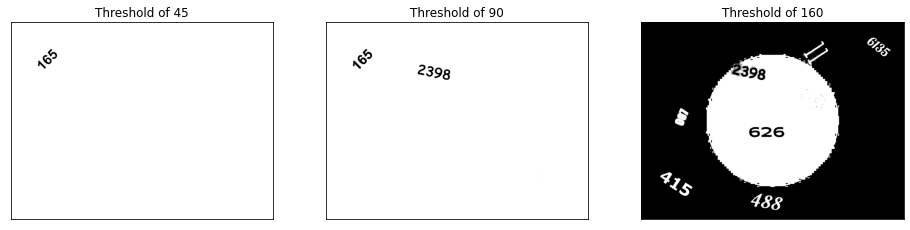

In [ ]:
#Converting the image to grayscale so that we can work with a 2D array for each treshold
gray1 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray3 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def simpletreshold(gray , treshold): 
  for i in range(gray.shape[0]):
      for j in range(gray.shape[1]): 
      
        if (gray[i,j]>treshold):
            gray[i,j] = 255
        else: 
            gray[i,j]=0
  return gray

simple_45 = simpletreshold(gray1 , 45)
simple_90 = simpletreshold(gray2, 90)
simple_160 = simpletreshold(gray3, 160)

plt.figure(figsize=(16, 20))
plt.subplot(131), plt.imshow(simple_45, cmap="gray")
plt.title("Threshold of 45"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(simple_90, cmap="gray")
plt.title("Threshold of 90"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(simple_160, cmap="gray")
plt.title("Threshold of 160"), plt.xticks([]), plt.yticks([])
plt.show()





## 1.2 Observations on simple binary tresholding

**Write your observations about thresholded images at different thresholds. How many and which numbers are segmented at each threshold? Note: A number is considered as segmented if all digits of that number are clearly visible as foreground or background in the thresholded image. What else do you observe at each threshold? **

The different tresholds imply certain pixels are revealed and others aren't based on their intensity. The lighter pixels will become white for most tresholds as their intensity value is close to 255 , and the darker pixels will tend to become black for most tresholds as their value is close to 0. 

For the first treshold of 45 , only darker colors will become black since their intensity is lesser than 45. This is why only the number 165 was segmented,  it is the darkest object in the image , and every other object in the image has a value larger than 45 and was therefore shown as a white pixel. The background was also set to white as it is a light grey color. 

For the treshold of 90 , slightly lighter pixels were not set as white , hence why 2398 was segmented and shown in black. It has a dark grey color in the original image that has an intensity value less than 90. Here the background is also white , its value is larger than 90. There are two segmented numbers here 2398 and 165.

For the treshold of 160, a lot of objects were still set to white , as they had a value smaller than 160. The background is now at a value smaller than 160 , so it was set to black and allowed for 6 numbers :  415, 488 , 11, 6135 ,626, and 007 to be segmented. The circle in the middle represents the circle of light that was lighter in the circle , and hence still larger than 160. 165 and 2398 were set to black once again of course , and are not segmented due to majority of the background color being set to black. Here we can see that the 2 of 2398 , is quite blurier than the rest of the numebr , this is due to the fact that it is at the border of the lightspot in the center , and hence certain pixels are set to white and others to black

## 1.3 Window binary tresholding

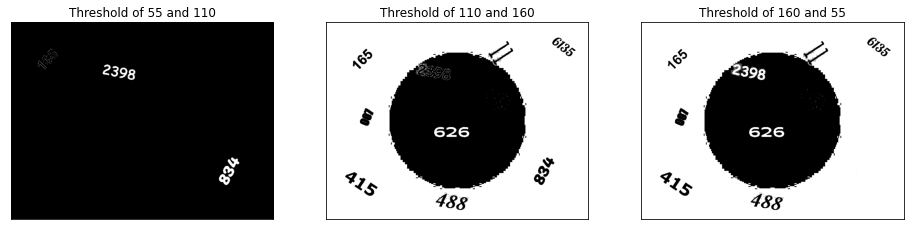

In [ ]:
#Converting the image to grayscale so that we can work with a 2D array for each treshold
gray4 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray5 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray6 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def windowtreshold(gray , treshold1, treshold2): 
  for i in range(gray.shape[0]):
      for j in range(gray.shape[1]): 
       
        if (gray[i,j] > treshold2 and gray[i,j]< treshold1):
            gray[i,j] = 255
      
        else: 
            gray[i,j]=0
  return gray

window_1 = windowtreshold(gray4 , 110, 55)
window_2 = windowtreshold(gray5, 160, 110)
window_3 = windowtreshold(gray6, 160, 55)

plt.figure(figsize=(16, 20))
plt.subplot(131), plt.imshow(window_1, cmap="gray")
plt.title("Threshold of 55 and 110"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(window_2, cmap="gray")
plt.title("Threshold of 110 and 160"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(window_3, cmap="gray")
plt.title("Threshold of 160 and 55"), plt.xticks([]), plt.yticks([])
plt.show()

Treshold between 55 and 110 : 2398 and 834 are segmented , and the outline of 165 is visible. This is because the edges of the number are a slightly different shade , and therefore some fall within the window and others don't. The background is black because it does not fall into the treshold. 

Treshold of 110 and 160 : 8 numbers are properly segmented : 626, 6135, 834, 488, 415, 007, 11 and 165 . We can see the edges of 2398 for the same reason as earlier , its edges are not the same color as the fill. The majority of the background is black , except for the spotlight in the center.

Treshold of 160 and 55 : 8 numbers are properly segmented : 165, 007, 2398 , 626, 415 , 488 , 6138 and 11. 834 disappeared because it was in the treshold and turned white. 

##Practical application


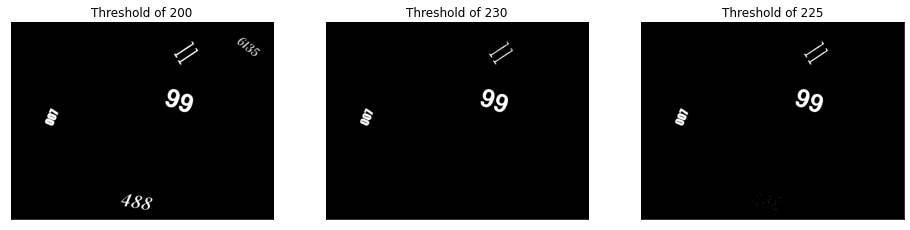

In [ ]:
#Converting the image to grayscale so that we can work with a 2D array for each treshold
gray7 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray8 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray9 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

simple_4 = simpletreshold(gray7 , 200)
simple_5 = simpletreshold(gray8, 230)
simple_6 = simpletreshold(gray9, 225)

plt.figure(figsize=(16, 20))
plt.subplot(131), plt.imshow(simple_4, cmap="gray")
plt.title("Threshold of 200"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(simple_5, cmap="gray")
plt.title("Threshold of 230"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(simple_6, cmap="gray")
plt.title("Threshold of 225"), plt.xticks([]), plt.yticks([])
plt.show()

Here I opted for a simple binary treshold method , because since the desired objects were white , we knew that the highest treshold would be 255 , and there would be no need for a window binary treshold. The first binary treshold , allowed for numbers that were a bit too dark to be set to white , so the treshold was brought up for the second image , but only the edges of the 99 were visible since they were lighter. FInally, a slight decresed allowed for the fill to be visible in the third output.

# 2. Denoising
Write your own code in NumPy for convolution.

## 2.0 Convolution

In [ ]:
#Initial setup 
tower = mpimg.imread('/content/drive/My Drive/ECSE 415/Assignment1/images/Tower.png')
tower_white_noise = mpimg.imread('/content/drive/My Drive/ECSE 415/Assignment1/images/Tower_Gauss_Noise.png')

#Converting the white noise image to grayscale 
gray_tower = cv2.cvtColor(tower, cv2.COLOR_RGB2GRAY)
gray_tower_noise = cv2.cvtColor(tower_white_noise, cv2.COLOR_RGB2GRAY)


#convolution method f is the input image , h is kernel , zero padding 

def convolution(f, h): 

  

  #getting the width and height of the kernel
  f_row = f.shape[0]
  f_col = f.shape[1]
  h_row = h.shape[0]
  h_col = h.shape[1]

 #initializing g (output)

  g = np.zeros(f.shape)

  

  #Convolution 

#for every pixel in the image
  for i in range(f_row):

     

    if i > f_row - h_row: 
      break 

    for j in range(f_col):

      if j > f_col - h_col: 
        break

      try: 
        g[i,j] = np.sum(h*f[i: i + h_row , j : j + h_col])
      except : 
        break
  return g




##2.1 Gaussian Filter

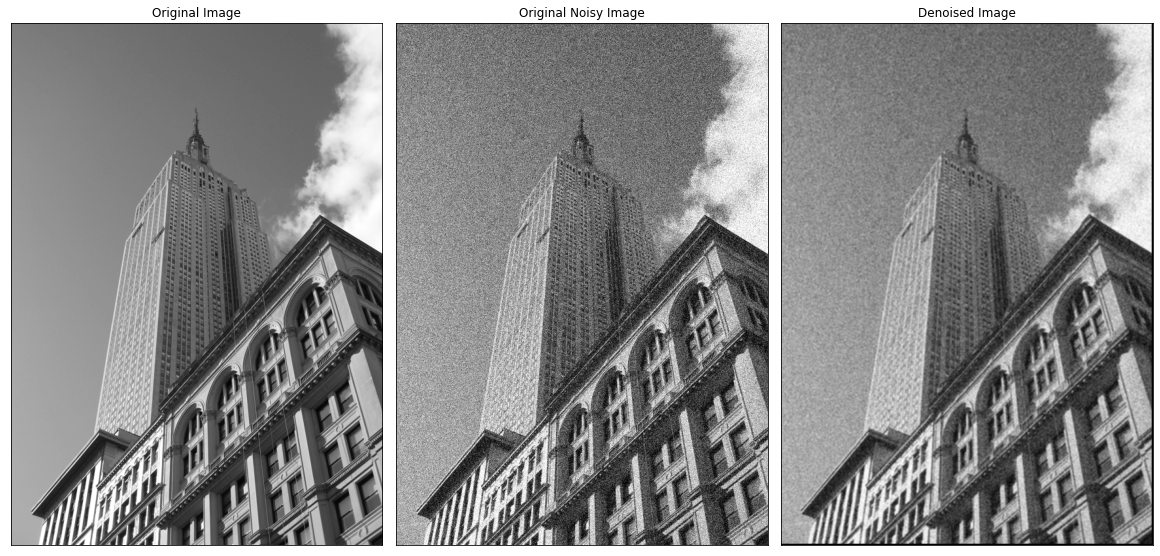

In [ ]:
#Gaussian filter 
import math



def gaussian(size, variance):

    kernel_row = np.linspace(-(size // 2), size // 2, size)

    xx, yy = np.meshgrid(kernel_row, kernel_row)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(variance))

    return kernel / np.sum(kernel)

def gaussian_blur(image, kernel_size):
    kernel = gaussian(kernel_size, 2)
    return convolution(image, kernel)


gaussian_tower_noise = gaussian_blur(gray_tower_noise, 3)


plt.figure(figsize=(16, 20), constrained_layout=True)
plt.subplot(131), plt.imshow(gray_tower, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gray_tower_noise, cmap="gray")
plt.title("Original Noisy Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gaussian_tower_noise, cmap="gray")
plt.title("Denoised Image"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.2 Box Filter

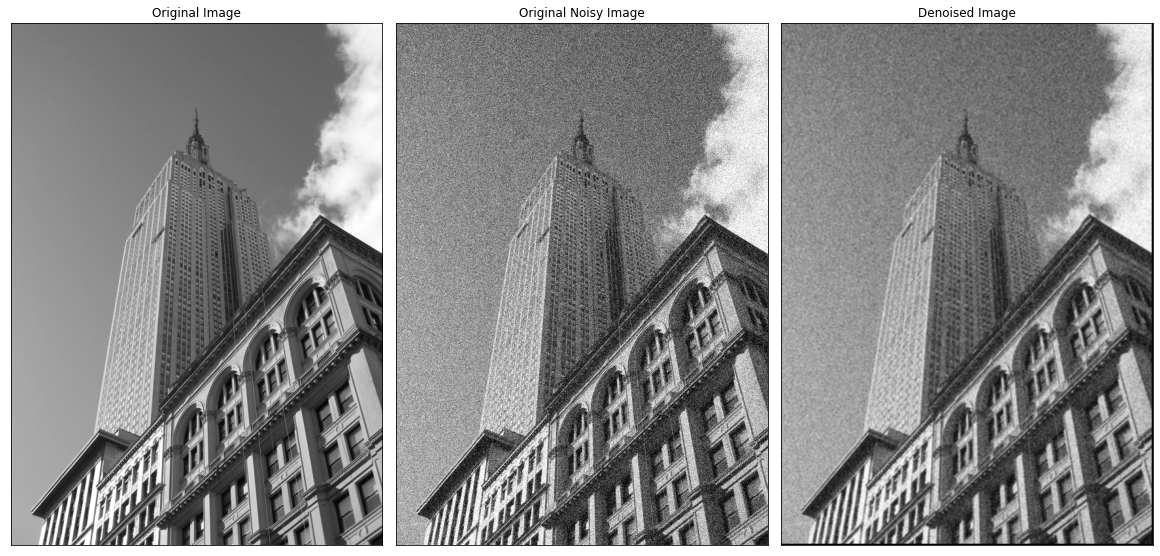

In [ ]:
box_filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32)/9.0 

box_tower_noise = convolution(gray_tower_noise, box_filter)


plt.figure(figsize=(16, 20), constrained_layout=True)
plt.subplot(131), plt.imshow(gray_tower, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gray_tower_noise, cmap="gray")
plt.title("Original Noisy Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(box_tower_noise, cmap="gray")
plt.title("Denoised Image"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.3 PSNR between box and gaussian filter

In [ ]:
gaussian_PSNR = peak_signal_noise_ratio(gray_tower, gaussian_tower_noise)
box_PSNR = peak_signal_noise_ratio(gray_tower, box_tower_noise)

print(f"Gaussian Filter PSNR: {gaussian_PSNR}")
print(f"Box Filter PSNR: {box_PSNR}")

Gaussian Filter PSNR: 19.890381555580213
Box Filter PSNR: 19.927800061895077


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  


Here the Gaussian and box filters give very similar values , although the box filter is slightly higher. 

## 2.4 Gaussian filter on salt and pepper noise 


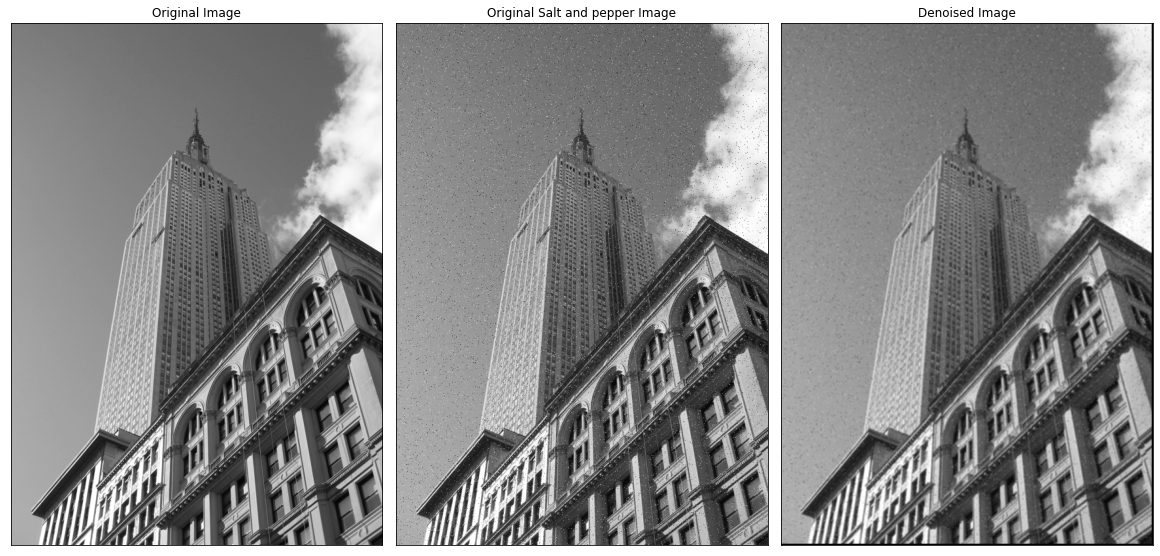

In [ ]:
#Setup 
tower_salt_noise = mpimg.imread('/content/drive/My Drive/ECSE 415/Assignment1/images/Tower_Salt_and_Pepper_Noise.png')

#Converting the white noise image to grayscale 
gray_tower_salt = cv2.cvtColor(tower_salt_noise, cv2.COLOR_RGB2GRAY)

gaussian_tower_salt_noise = gaussian_blur(gray_tower_salt, 3)


plt.figure(figsize=(16, 20), constrained_layout=True)
plt.subplot(131), plt.imshow(gray_tower, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gray_tower_salt, cmap="gray")
plt.title("Original Salt and pepper Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gaussian_tower_salt_noise, cmap="gray")
plt.title("Denoised Image"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.5 Median filter denoising

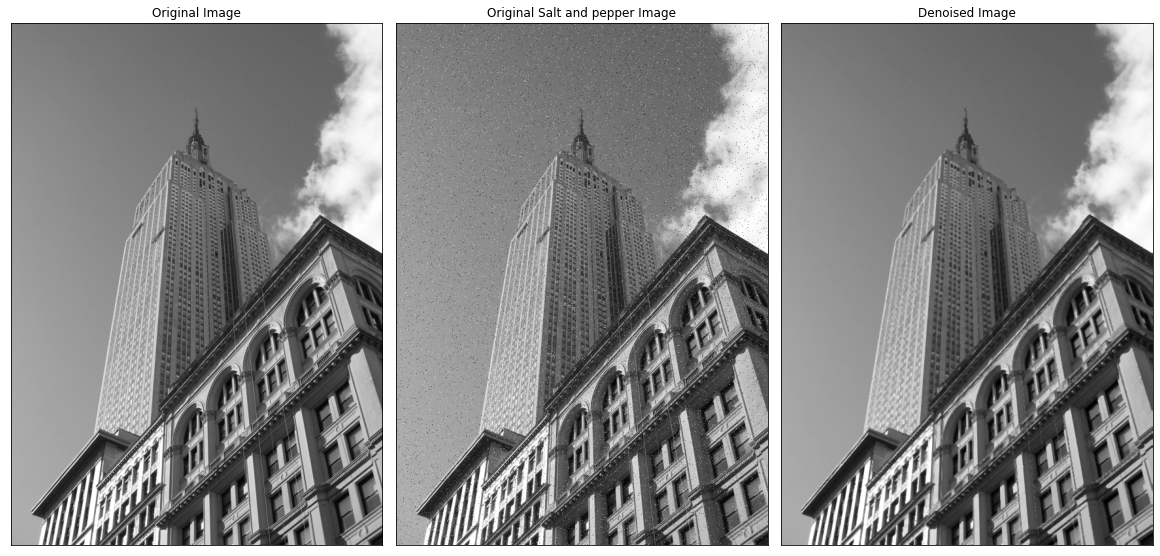

In [ ]:
def median(image, kernel_size):

  output_image = np.zeros_like(image)
  # traverse image
  for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
      output_image[i,j] = np.median(image[i:i+kernel_size, j:j+kernel_size])
  return output_image



median_tower = median(gray_tower_salt , 3)
plt.figure(figsize=(16, 20), constrained_layout=True)
plt.subplot(131), plt.imshow(gray_tower, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gray_tower_salt, cmap="gray")
plt.title("Original Salt and pepper Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(median_tower, cmap="gray")
plt.title("Denoised Image"), plt.xticks([]), plt.yticks([])
plt.show()


## PSNR of salt and pepper image

In [ ]:
gaussian_salt_PSNR = peak_signal_noise_ratio(gray_tower, gaussian_tower_salt_noise)
median_PSNR = peak_signal_noise_ratio(gray_tower, median_tower)

print(f"Gaussian Filter PSNR: {gaussian_salt_PSNR}")
print(f"Median Filter PSNR: {median_PSNR}")

Gaussian Filter PSNR: 20.24705474219391
Median Filter PSNR: 20.868731367748197


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """Entry point for launching an IPython kernel.


Here the median filter gives a better result and a slightly higher PSNR which is to be expected because it is able to remove the noise without affecting the edges by setting the pixel value as the median. 

# Sobel Edge detector

##3.1 Sobel Edge Detector with various kernel sizes

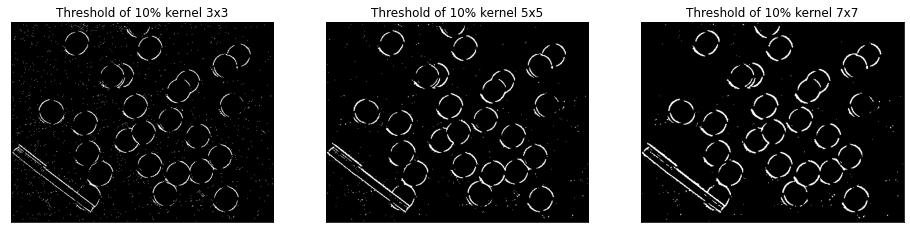

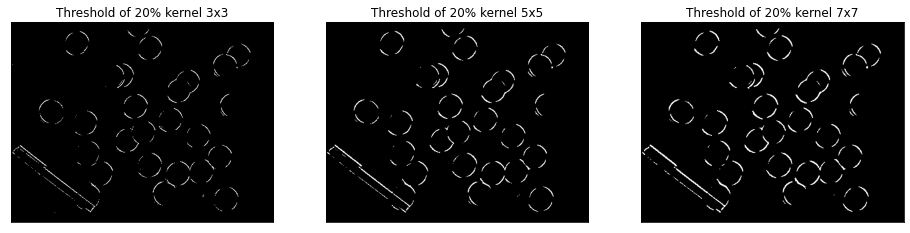

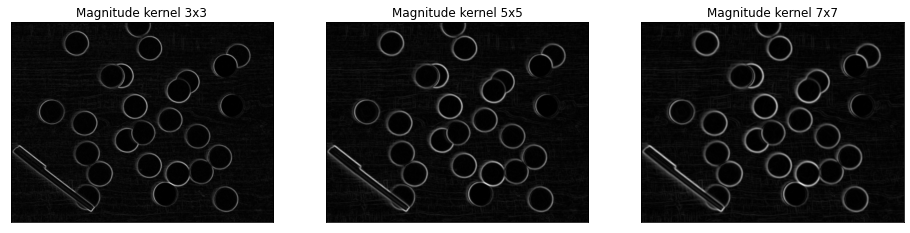

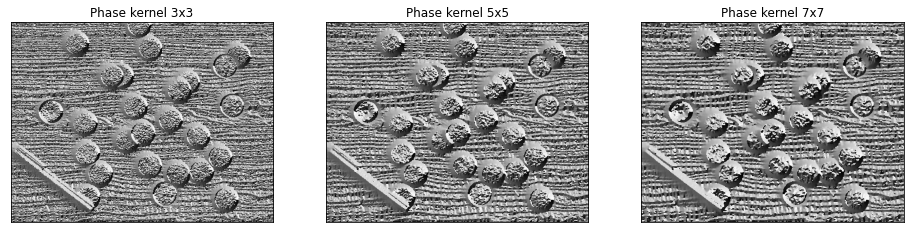

In [ ]:
#Setup 
#Initial setup 
circles = mpimg.imread('/content/drive/My Drive/ECSE 415/Assignment1/images/Circles.png')


#Converting the white noise image to grayscale 
gray_circles = cv2.cvtColor(circles, cv2.COLOR_RGB2GRAY)


#Treshold for sobel 
def sobel_threshhold(image, thresh):

  #getting the maximum pixel of the image
  
  max = np.max(image)
  t = thresh * max
  

  ret, threshold = cv2.threshold(image, t, 255, cv2.THRESH_BINARY)

  return threshold

def magnitude(image, kernel):

  sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=kernel)  
  sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=kernel)

  magnitude = cv2.magnitude(sobelx , sobely)

  return magnitude

def phase(image, kernel) : 
  sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=kernel)  
  sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=kernel)

  phase = cv2.phase(sobelx , sobely)

  return phase

def display(image) : 
  sobel_3 = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
  sobel_5 = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
  sobel_7 = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=7)

  sobel_3_10 = sobel_threshhold(sobel_3 , 0.1)
  sobel_5_10 = sobel_threshhold(sobel_5, 0.1)
  sobel_7_10 = sobel_threshhold(sobel_7, 0.1)

  sobel_3_20 = sobel_threshhold(sobel_3, 0.2)
  sobel_5_20 = sobel_threshhold(sobel_5 , 0.2)
  sobel_7_20 = sobel_threshhold(sobel_7, 0.2)

  magnitude_3 = magnitude(image, 3)
  magnitude_5 = magnitude(image, 5)
  magnitude_7 = magnitude(image, 7)

  phase_3 = phase(image, 3)
  phase_5 = phase(image, 5)
  phase_7 = phase(image, 7)

  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(sobel_3_10, cmap="gray")
  plt.title("Threshold of 10% kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(sobel_5_10, cmap="gray")
  plt.title("Threshold of 10% kernel 5x5"), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(sobel_7_10, cmap="gray")
  plt.title("Threshold of 10% kernel 7x7"), plt.xticks([]), plt.yticks([])
  plt.show()


  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(sobel_3_20, cmap="gray")
  plt.title("Threshold of 20% kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(sobel_5_20, cmap="gray")
  plt.title("Threshold of 20% kernel 5x5"), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(sobel_7_20, cmap="gray")
  plt.title("Threshold of 20% kernel 7x7"), plt.xticks([]), plt.yticks([])
  plt.show()

  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(magnitude_3, cmap="gray")
  plt.title("Magnitude kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(magnitude_5, cmap="gray")
  plt.title("Magnitude kernel 5x5"), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(magnitude_7, cmap="gray")
  plt.title("Magnitude kernel 7x7"), plt.xticks([]), plt.yticks([])
  plt.show()

  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(phase_3, cmap="gray")
  plt.title("Phase kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(phase_5, cmap="gray")
  plt.title("Phase kernel 5x5"), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(phase_7, cmap="gray")
  plt.title("Phase kernel 7x7"), plt.xticks([]), plt.yticks([])
  plt.show()

_ = display(gray_circles)


##3.2 Effect of the filter on the output 
The main differences that we can notice from the effect of the various kernels are the width of the lines and the amount of noise. It's clear in all the outputted images that the 7x7 kernel produces images with larger borders this is due to the fact that the pixels in the 7x7 kernel are influenced by a larger amount of pixels. The tresholded images also have a lesser amount of noise as the kernel gets larger because they can filter out the noisy pixels.

## 3.3 Sobel Edge detector with different tresholds

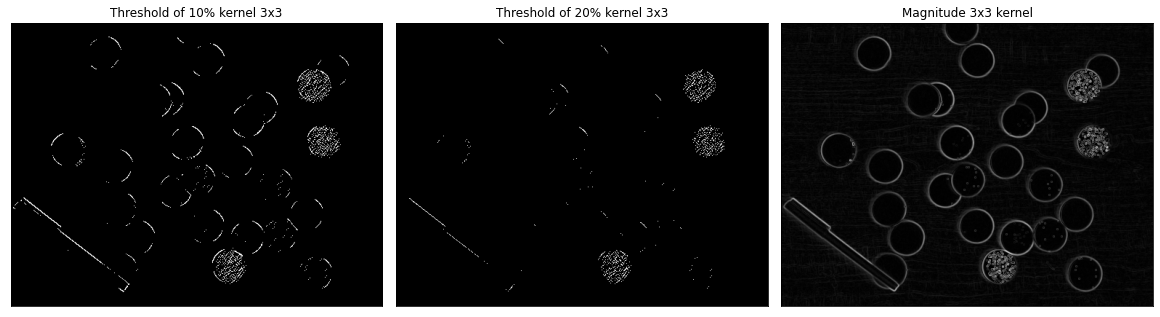

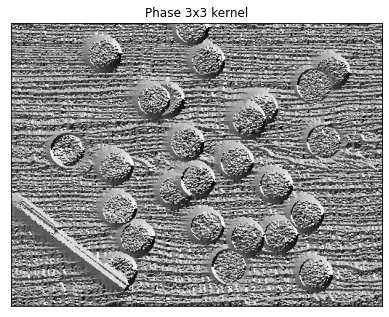

In [ ]:
#Setup
circles_noise = mpimg.imread('/content/drive/My Drive/ECSE 415/Assignment1/images/Circles_gauss.png')

#Converting the white noise image to grayscale 
gray_circles_noise = cv2.cvtColor(circles_noise, cv2.COLOR_RGB2GRAY)

def display_noise(image):
  sobel_3 = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)


  sobel_3_10 = sobel_threshhold(sobel_3 , 0.1)

  sobel_3_20 = sobel_threshhold(sobel_3, 0.2)


  magnitude_3 = magnitude(image, 3)


  phase_3 = phase(image, 3)


  plt.figure(figsize=(16, 20), constrained_layout=True)
  plt.subplot(131), plt.imshow(sobel_3_10, cmap="gray")
  plt.title("Threshold of 10% kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(sobel_3_20, cmap="gray")
  plt.title("Threshold of 20% kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(magnitude_3, cmap="gray")
  plt.title("Magnitude 3x3 kernel"), plt.xticks([]), plt.yticks([])
  plt.show()

  plt.figure(figsize=(16, 20), constrained_layout=True)
  plt.subplot(131), plt.imshow(phase_3, cmap="gray")
  plt.title("Phase 3x3 kernel"), plt.xticks([]), plt.yticks([])

  plt.show()
_ = display_noise(gray_circles_noise)



## 3.4 Denoising the image



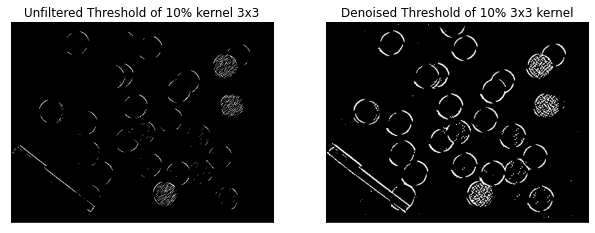

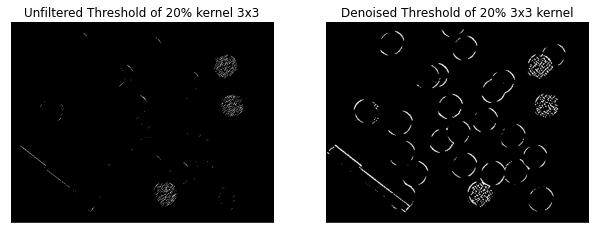

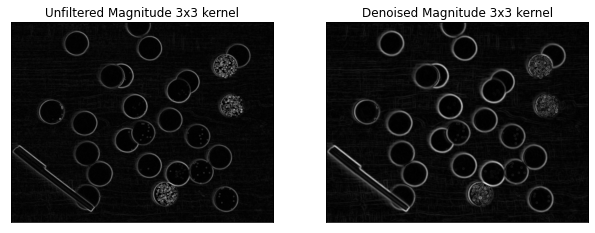

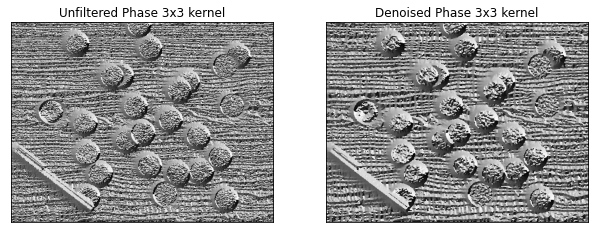

In [ ]:
#Denoising the image beforehand
box_filter_3 = np.ones((3,3), np.float32)/(3*3)
circles_noise_box = cv2.filter2D(gray_circles_noise,-1,box_filter_3)

def display_denoise(denoised , image): 
  sobel_3 = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
  sobel_3_denoised = cv2.Sobel(denoised, cv2.CV_64F, 1, 1, ksize=3)


  sobel_3_10 = sobel_threshhold(sobel_3 , 0.1)
  sobel_3_10_denoised = sobel_threshhold(sobel_3_denoised , 0.1)
  sobel_3_20 = sobel_threshhold(sobel_3, 0.2)
  sobel_3_20_denoised = sobel_threshhold(sobel_3_denoised, 0.2)

  magnitude_3 = magnitude(image, 3)
  magnitude_3_denoised = magnitude(denoised, 3)

  phase_3 = phase(image, 3)
  phase_3_denoised = phase(denoised, 3)

  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(sobel_3_10, cmap="gray")
  plt.title("Unfiltered Threshold of 10% kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(sobel_3_10_denoised, cmap="gray")
  plt.title("Denoised Threshold of 10% 3x3 kernel"), plt.xticks([]), plt.yticks([])
  plt.show()

  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(sobel_3_20, cmap="gray")
  plt.title("Unfiltered Threshold of 20% kernel 3x3"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(sobel_3_20_denoised, cmap="gray")
  plt.title("Denoised Threshold of 20% 3x3 kernel"), plt.xticks([]), plt.yticks([])
  plt.show()

  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(magnitude_3, cmap="gray")
  plt.title("Unfiltered Magnitude 3x3 kernel"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(magnitude_3_denoised, cmap="gray")
  plt.title("Denoised Magnitude 3x3 kernel"), plt.xticks([]), plt.yticks([])
  plt.show()

  plt.figure(figsize=(16, 20))
  plt.subplot(131), plt.imshow(phase_3, cmap="gray")
  plt.title("Unfiltered Phase 3x3 kernel"), plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(phase_3_denoised, cmap="gray")
  plt.title("Denoised Phase 3x3 kernel"), plt.xticks([]), plt.yticks([])
  plt.show()

_ = display_denoise(circles_noise_box, gray_circles_noise)



## Comments on the effectiveness of denoising 

Denoising was very effective in removing the noise prior to applying the filters. This resulted in ouputted images that were very clear and had no difficulty detecting edges. Indeed , with a large amount of noise in the image, the tresholder (especially the 20%) , got rid of a lot of pixels that had a higher intensity, since the noise was placed on the circles, a lot of that information was lost. Denoising beforehand allows for the majority of the noise to be gone before the edge detection , and hence returns much clearer images. It gives a similar result to the larger kernels that were able to smooth out the image, and only displaying edges with a large intensity. We can also notice that the magnitude and phase images were not largerly affected by the noise , but did return more clear edges once the denoiser was applied. 